In [1]:
# Now with tensorflow

import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

pickle_file = 'housingNantesAllInfoFullImages.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_prices_labels = save['train_prices_labels']
  train_nbRooms_labels = save['train_nbRooms_labels']
  train_surfaceHouse_labels = save['train_surfaceHouse_labels']
  train_surfaceLand_labels = save['train_surfaceLand_labels']
  train_nbPictures_labels = save['train_nbPictures_labels']
  valid_dataset = save['valid_dataset']
  valid_prices_labels = save['valid_prices_labels']
  valid_nbRooms_labels = save['valid_nbRooms_labels']
  valid_surfaceHouse_labels = save['valid_surfaceHouse_labels']
  valid_surfaceLand_labels = save['valid_surfaceLand_labels']
  valid_nbPictures_labels = save['valid_nbPictures_labels']



  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_prices_labels.shape,train_nbRooms_labels.shape,train_surfaceHouse_labels.shape,train_surfaceLand_labels.shape,train_nbPictures_labels.shape)
  print('Validation set', valid_dataset.shape, valid_prices_labels.shape,valid_nbRooms_labels.shape,valid_surfaceHouse_labels.shape,valid_surfaceLand_labels.shape,valid_nbPictures_labels.shape)

image_size = 56

('Training set', (1882, 56, 56), (1882, 1), (1882, 1), (1882, 1), (1882, 1), (1882, 1))
('Validation set', (764, 56, 56), (764, 1), (764, 1), (764, 1), (764, 1), (764, 1))


In [2]:
# clean prices == 0

price_equals_zero_list = []

for i,price in enumerate(train_prices_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = train_prices_labels.shape[0]-len(price_equals_zero_list)

train_labels_prices_no_zeros = np.zeros((new_dim, 1))

train_labels_nbRooms_no_zeros = np.zeros((new_dim, 1))
train_labels_surfaceHouse_no_zeros = np.zeros((new_dim, 1))
train_labels_surfaceLand_no_zeros = np.zeros((new_dim, 1))
train_labels_nbPictures_no_zeros = np.zeros((new_dim, 1))

train_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(train_prices_labels):
    if price != 0:
        train_labels_prices_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(train_dataset):
    if i not in price_equals_zero_list:
        train_images_no_zeros[j,:,:] = image  
        j += 1

j = 0
for i,nbRooms in enumerate(train_nbRooms_labels):
    if i not in price_equals_zero_list:
        train_labels_nbRooms_no_zeros[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(train_surfaceHouse_labels):
    if i not in price_equals_zero_list:
        train_labels_surfaceHouse_no_zeros[j][0] = surfaceHouse  
        j += 1

j = 0
for i,surfaceLand in enumerate(train_surfaceLand_labels):
    if i not in price_equals_zero_list:
        train_labels_surfaceLand_no_zeros[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(train_nbPictures_labels):
    if i not in price_equals_zero_list:
        train_labels_nbPictures_no_zeros[j][0] = nbPictures  
        j += 1
        
# for validation:

price_equals_zero_list = []

for i,price in enumerate(valid_prices_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = valid_prices_labels.shape[0]-len(price_equals_zero_list) 

valid_labels_prices_no_zeros = np.zeros((new_dim, 1))
valid_labels_nbRooms_no_zeros = np.zeros((new_dim, 1))
valid_labels_surfaceHouse_no_zeros = np.zeros((new_dim, 1))
valid_labels_surfaceLand_no_zeros = np.zeros((new_dim, 1))
valid_labels_nbPictures_no_zeros = np.zeros((new_dim, 1))

valid_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(valid_prices_labels):
    if price != 0:
        valid_labels_prices_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(valid_dataset):
    if i not in price_equals_zero_list:
        valid_images_no_zeros[j,:,:] = image  
        j += 1    

j = 0        
for i,nbRooms in enumerate(valid_nbRooms_labels):
    if i not in price_equals_zero_list:
        valid_labels_nbRooms_no_zeros[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(valid_surfaceHouse_labels):
    if i not in price_equals_zero_list:
        valid_labels_surfaceHouse_no_zeros[j][0] = surfaceHouse  
        j += 1

j = 0
for i,surfaceLand in enumerate(valid_surfaceLand_labels):
    if i not in price_equals_zero_list:
        valid_labels_surfaceLand_no_zeros[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(valid_nbPictures_labels):
    if i not in price_equals_zero_list:
        valid_labels_nbPictures_no_zeros[j][0] = nbPictures  
        j += 1

16
18


In [3]:
# clean surfaceHouse == 0

surface_equals_zero_list = []

for i,surface in enumerate(train_labels_surfaceHouse_no_zeros):
    if surface == float(0):
        surface_equals_zero_list.append(i)  

print len(surface_equals_zero_list)   

new_dim = train_labels_prices_no_zeros.shape[0]-len(surface_equals_zero_list) 

train_labels_prices_surface_clean = np.zeros((new_dim, 1))

train_labels_nbRooms_surface_clean = np.zeros((new_dim, 1))
train_labels_surfaceHouse_surface_clean = np.zeros((new_dim, 1))
train_labels_surfaceLand_surface_clean = np.zeros((new_dim, 1))
train_labels_nbPictures_surface_clean = np.zeros((new_dim, 1))

train_images_surface_clean = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(train_labels_prices_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_prices_surface_clean[j][0] = price  
        j += 1
        
j = 0
for i,image in enumerate(train_images_no_zeros):
    if i not in surface_equals_zero_list:
        train_images_surface_clean[j,:,:] = image  
        j += 1    
        
j = 0
for i,nbRooms in enumerate(train_labels_nbRooms_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_nbRooms_surface_clean[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(train_labels_surfaceHouse_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_surfaceHouse_surface_clean[j][0] = surfaceHouse  
        j += 1
        
j = 0
for i,surfaceLand in enumerate(train_labels_surfaceLand_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_surfaceLand_surface_clean[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(train_labels_nbPictures_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_nbPictures_surface_clean[j][0] = nbPictures  
        j += 1 

# validation
surface_equals_zero_list = []

for i,surface in enumerate(valid_labels_surfaceHouse_no_zeros):
    if surface == float(0):
        surface_equals_zero_list.append(i)  

print len(surface_equals_zero_list)   

new_dim = valid_labels_prices_no_zeros.shape[0]-len(surface_equals_zero_list) 

valid_labels_prices_surface_clean = np.zeros((new_dim, 1))

valid_labels_nbRooms_surface_clean = np.zeros((new_dim, 1))
valid_labels_surfaceHouse_surface_clean = np.zeros((new_dim, 1))
valid_labels_surfaceLand_surface_clean = np.zeros((new_dim, 1))
valid_labels_nbPictures_surface_clean = np.zeros((new_dim, 1))

valid_images_surface_clean = np.zeros((new_dim, image_size,image_size))


j = 0
for i,price in enumerate(valid_labels_prices_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_prices_surface_clean[j][0] = price  
        j += 1
        
j = 0
for i,image in enumerate(valid_images_no_zeros):
    if i not in surface_equals_zero_list:
        valid_images_surface_clean[j,:,:] = image  
        j += 1    
        
j = 0
for i,nbRooms in enumerate(valid_labels_nbRooms_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_nbRooms_surface_clean[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(valid_labels_surfaceHouse_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_surfaceHouse_surface_clean[j][0] = surfaceHouse  
        j += 1
        
j = 0
for i,surfaceLand in enumerate(valid_labels_surfaceLand_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_surfaceLand_surface_clean[j][0] = surfaceLand  
        j += 1
        
j = 0
for i,nbPictures in enumerate(valid_labels_nbPictures_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_nbPictures_surface_clean[j][0] = nbPictures  
        j += 1 

79
39


In [4]:
# reformat prices to have then between 0 and 1

max_value = max(max(train_labels_prices_surface_clean),max(valid_labels_prices_surface_clean))

train_prices_labels = (train_labels_prices_surface_clean - max_value / 2) / max_value

valid_prices_labels = (valid_labels_prices_surface_clean - max_value / 2) / max_value


train_nbRooms_labels = train_labels_nbRooms_surface_clean
train_surfaceHouse_labels = train_labels_surfaceHouse_surface_clean
train_surfaceLand_labels = train_labels_surfaceLand_surface_clean
train_nbPictures_labels = train_labels_nbPictures_surface_clean
valid_nbRooms_labels = valid_labels_nbRooms_surface_clean
valid_surfaceHouse_labels = train_labels_surfaceHouse_surface_clean
valid_surfaceLand_labels = valid_labels_surfaceLand_surface_clean
valid_nbPictures_labels = valid_labels_nbPictures_surface_clean


In [5]:
    
# Separate image tensors and info tensors

# reformat images to 2d array 56*56
train_images = train_images_surface_clean.reshape((-1, image_size * image_size)).astype(np.float32)
valid_images = valid_images_surface_clean.reshape((-1, image_size * image_size)).astype(np.float32)


# build the dataset for complementary info from json files
nb_variables = 4

train_info = np.zeros((train_images.shape[0],nb_variables))

# Reformat the variables to have them between -1 and 1
nbRooms_max = max(max(train_nbRooms_labels), max(valid_nbRooms_labels))
surface_max = max(max(train_surfaceHouse_labels), max(valid_surfaceHouse_labels))
surfaceLand_max = max(max(train_surfaceLand_labels), max(valid_surfaceLand_labels))
nbPictures_max = max(max(train_nbPictures_labels), max(valid_nbPictures_labels))

for i in range(train_images.shape[0]):
        train_info[i][0] = ( train_nbRooms_labels[i] - nbRooms_max /2 ) / nbRooms_max
        train_info[i][1] = ( train_surfaceHouse_labels[i] - surface_max /2 ) / surface_max
        train_info[i][2] = ( train_surfaceLand_labels[i] - surfaceLand_max /2 ) / surfaceLand_max
        train_info[i][3] = ( train_nbPictures_labels[i] - nbPictures_max /2 ) / nbPictures_max

    
valid_info = np.zeros((valid_images.shape[0],nb_variables))

for i in range(valid_images.shape[0]):
        valid_info[i][0] = ( valid_nbRooms_labels[i] - nbRooms_max /2 ) / nbRooms_max
        valid_info[i][1] = ( valid_surfaceHouse_labels[i] - surface_max /2 ) / surface_max
        valid_info[i][2] = ( valid_surfaceLand_labels[i] - surfaceLand_max /2 ) / surfaceLand_max
        valid_info[i][3] = ( valid_nbPictures_labels[i] - nbPictures_max /2 ) / nbPictures_max




In [6]:
# parameters to the function graph
num_labels= 1
dtype = tf.float32

batch_size = 40
num_hidden_info_labels = 20
num_hidden_image_labels = 40

regularization_beta = 5e-4


graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation into constants that are
  # attached to the graph.
    tf_train_info = tf.placeholder(dtype, shape=(batch_size,train_info.shape[1]))
    tf_train_price = tf.placeholder(dtype, shape=(batch_size,train_prices_labels.shape[1]))
    tf_valid_info = tf.placeholder(dtype, shape=[None,train_info.shape[1]])
    
    tf_train_images = tf.placeholder(dtype, shape=[batch_size,image_size * image_size])
    tf_valid_images = tf.placeholder(dtype, shape=[None,image_size * image_size])
    
  # Variables.
    
    # info layer
    
    weights_info_layer = tf.Variable(tf.truncated_normal([nb_variables, num_hidden_info_labels]))
    biases_info_layer = tf.Variable(tf.zeros([num_hidden_info_labels]))
    info_layer = tf.nn.relu(tf.matmul(tf_train_info , weights_info_layer) + biases_info_layer)
    
    # image layer
    
    weights_image_layer = tf.Variable(tf.truncated_normal([image_size * image_size, num_hidden_image_labels]))
    biases_image_layer = tf.Variable(tf.zeros([num_hidden_image_labels]))
    image_layer = tf.nn.relu(tf.matmul(tf_train_images , weights_image_layer) + biases_image_layer)
        
    # merged_layer 
    
    merged_layer = tf.concat([info_layer, image_layer],1)
    
    # output layer
    
    weights_output = tf.Variable(tf.truncated_normal([num_hidden_info_labels+num_hidden_image_labels,num_labels]))
    biases_output = tf.Variable(tf.zeros([num_labels]))
    
    # Training
    
    price_estimation = tf.matmul(merged_layer, weights_output) + biases_output
    
    loss = tf.reduce_sum(tf.square(price_estimation - tf_train_price)) /train_prices_labels.shape[0]
  
    # L2 regularization
    
    regularizers = (tf.nn.l2_loss(weights_image_layer) + tf.nn.l2_loss(biases_image_layer) +
                   tf.nn.l2_loss(weights_info_layer) + tf.nn.l2_loss(biases_info_layer) +
                    tf.nn.l2_loss(weights_output) + tf.nn.l2_loss(biases_output)
                   )
    
    loss = loss + regularization_beta * regularizers
 
  # Optimizer.
  # We are going to find the minimum of this loss using AdagradOptimizer.
  #  AdagradOptimizer
    optimizer = tf.train.AdagradOptimizer(0.1).minimize(loss)
    #optimizer = tf.train.MomentumOptimizer(5, 0.001).minimize(loss)
  
  # Predictions for the training and validation.
  # Predictions
    
    train_prediction = price_estimation
    
    info_validation = tf.nn.relu(tf.matmul(tf_valid_info, weights_info_layer) + biases_info_layer)
    images_validation = tf.nn.relu(tf.matmul(tf_valid_images, weights_image_layer) + biases_image_layer)
    
    merged_validation = tf.concat([info_validation, images_validation],1)   
    
    valid_prediction = tf.matmul(merged_validation, weights_output) + biases_output
    

In [132]:
num_steps = 200001

def accuracy(prediction, price):
#  return np.mean(100 - 100*np.abs((prediction - price) / price))
  return 100 * np.mean(prediction / price)  

with tf.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_info.shape[0] - batch_size)
    batch_data = train_info[offset:(offset+batch_size),:]
    batch_images = train_images[offset:(offset+batch_size),:]    
    batch_labels = train_prices_labels[offset:(offset+batch_size),:]
    feed_dict = {tf_train_info: batch_data,tf_train_price:batch_labels,tf_valid_info:valid_info,tf_train_images:batch_images, tf_valid_images:valid_images}
    
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    _, l, predictions, valid_predictions = session.run([optimizer, loss, train_prediction, valid_prediction]
                                        , feed_dict=feed_dict)
    
    if (step % 1000 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, batch_labels))
      # Calling .eval() on valid_prediction is basically like calling run(), but
      # just to get that one numpy array. Note that it recomputes all its graph
      # dependencies.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_predictions, valid_prices_labels))

        

Initialized
Loss at step 0: 282.600616
Training accuracy: 6407.0%
Validation accuracy: 878.5%
Loss at step 1000: 197.355362
Training accuracy: 207.0%
Validation accuracy: -58.0%
Loss at step 2000: 164.115173
Training accuracy: 1839.3%
Validation accuracy: -42.5%
Loss at step 3000: 138.820923
Training accuracy: 219.8%
Validation accuracy: -66.8%
Loss at step 4000: 118.640144
Training accuracy: -600.6%
Validation accuracy: -78.8%
Loss at step 5000: 102.351860
Training accuracy: -182.4%
Validation accuracy: -54.2%
Loss at step 6000: 88.784950
Training accuracy: 169.2%
Validation accuracy: -54.4%
Loss at step 7000: 77.347748
Training accuracy: 355.8%
Validation accuracy: -50.6%
Loss at step 8000: 67.668884
Training accuracy: -60.3%
Validation accuracy: -28.2%
Loss at step 9000: 59.473392
Training accuracy: 332.6%
Validation accuracy: -11.9%
Loss at step 10000: 52.449345
Training accuracy: 319.9%
Validation accuracy: -3.9%
Loss at step 11000: 46.371601
Training accuracy: 238.4%
Validation a

KeyboardInterrupt: 

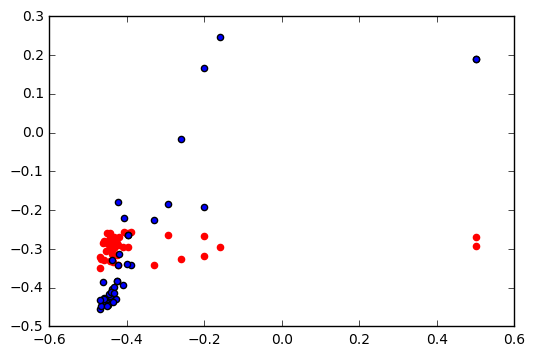

Rsquared on train:  0.666061855861
Rsquared on validation:  -1.28025892341


40

In [133]:
# training

from sklearn import linear_model
import matplotlib.pyplot as plt
from pylab import *

x = []
y = []

for i in range(batch_data.shape[0]):
    x.append(batch_data[i][1])
    y.append(predictions[i][0])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
result_lr = regr.fit(train_info, train_prices_labels)

prices_estimation = result_lr.predict(valid_info)

#w,b = polyfit(x, train_prices_labels, 1)

#print('weight', w)
#print('bias', b)

#pred_w = weight
#pred_b = bias

#pred_y = w*x + b

plt.scatter(x, y,color="r")

#plt.plot(x, pred_y,color="g")

plt.scatter(x, batch_labels)

plt.show()

print 'Rsquared on train: ', result_lr.score(train_info, train_prices_labels)

print 'Rsquared on validation: ', result_lr.score(valid_info, valid_prices_labels)

len(y)

('weight', array([-0.02774357]))
('bias', array([-0.35934017]))


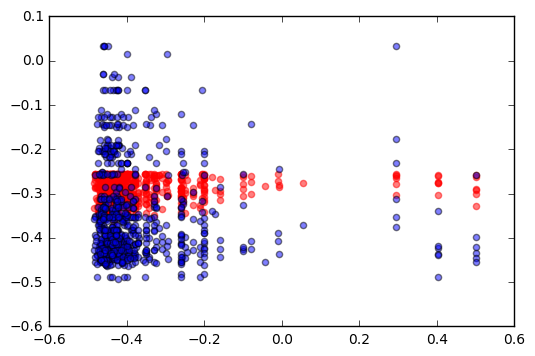

In [134]:
# Validation

from sklearn import linear_model
import matplotlib.pyplot as plt
from pylab import *

x = []

for i in range(valid_info.shape[0]):
    x.append(valid_info[i][1])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
result_lr = regr.fit(train_info, train_prices_labels)

prices_estimation = result_lr.predict(valid_info)

w,b = polyfit(x, valid_prices_labels, 1)

print('weight', w)
print('bias', b)

#pred_w = weight
#pred_b = bias

#pred_y = w*x + b

plt.scatter(x,valid_predictions,color="r",alpha=0.5)

#plt.plot(x, pred_y,color="g")

plt.scatter(x, valid_prices_labels,alpha=0.5)
#plt.ylim(range(0,2))

plt.show()
